In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt


def read_file(sku, path=''):
    df = pd.read_csv(path+str(sku) + '.csv', parse_dates=['Дата'])
    df.sort_values('Дата', ignore_index=True, inplace=True)
    df = df.set_index('Дата').astype(int)
    return df

MPSTATS_TOKEN = '66c04233432f66.5894123609e00723d37ad8ff3bd0e25d688cf5ba'

In [2]:
path = 'data/l2l_comp_data/'
sales_main_path = path + 'main/indeepa/'
sales_comp_path = path + 'comp/indeepa/'
skus = pd.read_excel(path+'competitors_mapping.xlsx', sheet_name=0)

In [7]:
sku1, sku2 = skus.iloc[5].values
df1 = read_file(sku1, sales_main_path)
df2 = read_file(sku2, sales_comp_path)

In [4]:
rolling1 = df1['Продажи, кол-во'][:-150].rolling(window=7).mean()
rolling2 = df2['Продажи, кол-во'][:-150].rolling(window=7).mean()
rolling1.corr(rolling2)

-0.21083996274519137

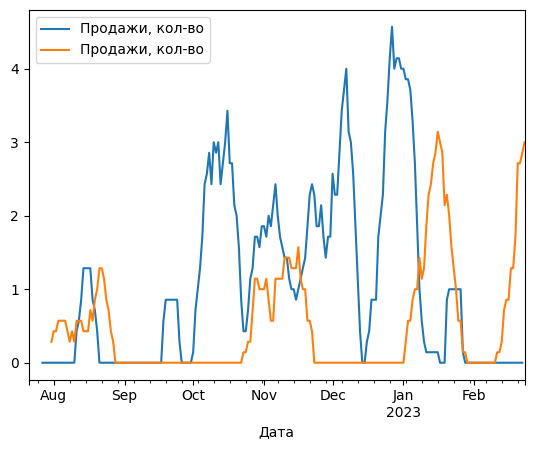

In [5]:
pd.concat([rolling1, rolling2], axis=1).plot();

In [6]:
windows = [1, 3, 5, 7, 9, 11, 14, 30]

# Товары Индипы

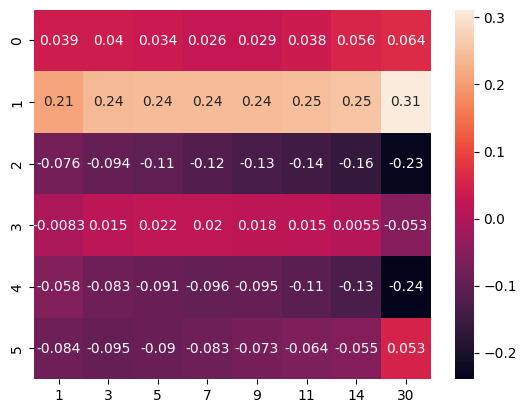

In [75]:
res = dict()
for window in windows:
    ctr = 0
    per_window = list()
    for row in skus.iterrows():
        sku1, sku2 = row[1].values
        df1 = read_file(sku1, sales_main_path)
        df2 = read_file(sku2, sales_comp_path)
        rolling1 = df1['Продажи, кол-во'].rolling(window=window).mean()
        rolling2 = df2['Продажи, кол-во'].rolling(window=window).mean()
        corr_window = rolling1.corr(rolling2, method='pearson')
        if corr_window < -0.1:
            ctr += 1
        per_window.append(corr_window)
    res.update({window:per_window})
res = pd.DataFrame(res)
sns.heatmap(res, annot=True);

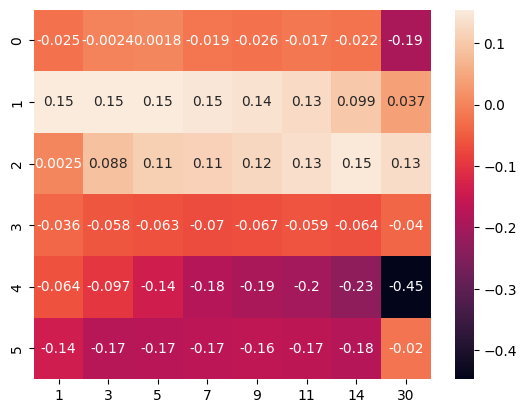

In [76]:
res = dict()
for window in windows:
    ctr = 0
    per_window = list()
    for row in skus.iterrows():
        sku1, sku2 = row[1].values
        df1 = read_file(sku1, sales_main_path)
        df2 = read_file(sku2, sales_comp_path)
        rolling1 = df1['Продажи, кол-во'].rolling(window=window).mean()
        rolling2 = df2['Продажи, кол-во'].rolling(window=window).mean()
        corr_window = rolling1.corr(rolling2, method='spearman')
        if corr_window < -0.1:
            ctr += 1
        per_window.append(corr_window)
    res.update({window:per_window})
res = pd.DataFrame(res)
sns.heatmap(res, annot=True);

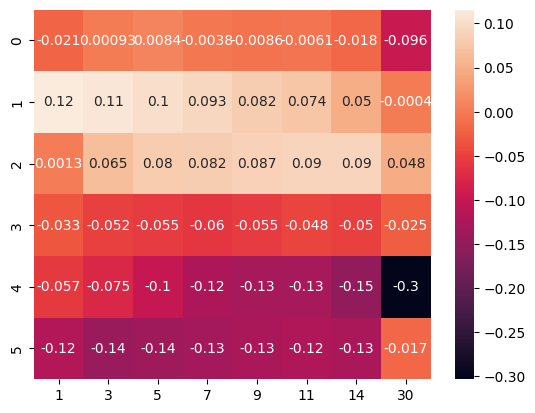

In [77]:
res = dict()
for window in windows:
    ctr = 0
    per_window = list()
    for row in skus.iterrows():
        sku1, sku2 = row[1].values
        df1 = read_file(sku1, sales_main_path)
        df2 = read_file(sku2, sales_comp_path)
        rolling1 = df1['Продажи, кол-во'].rolling(window=window).mean()
        rolling2 = df2['Продажи, кол-во'].rolling(window=window).mean()
        corr_window = rolling1.corr(rolling2, method='kendall')
        if corr_window < -0.1:
            ctr += 1
        per_window.append(corr_window)
    res.update({window:per_window})
res = pd.DataFrame(res)
sns.heatmap(res, annot=True);

# Товары OrganicLTD

In [87]:
sales_main_path = path + 'main/organicltd/'
sales_comp_path = path + 'comp/organicltd/'
skus = pd.read_excel(path+'competitors_mapping.xlsx', sheet_name=1)
# skus = skus.iloc[:-8]

In [88]:
def make_corr_matrix(windows, skus, method='pearson'):
    res = dict()
    for window in windows:
        ctr = 0
        per_window = list()
        for row in skus.iterrows():
            sku1, sku2 = row[1].values
            df1 = read_file(sku1, sales_main_path)
            df2 = read_file(sku2, sales_comp_path)
            rolling1 = df1['Продажи, кол-во'].rolling(window=window).mean()
            rolling2 = df2['Продажи, кол-во'].rolling(window=window).mean()
            corr_window = rolling1.corr(rolling2, method=method)
            if corr_window < -0.1:
                ctr += 1
            per_window.append(corr_window)
        res.update({window:per_window})
    res = pd.DataFrame(res)
    sns.heatmap(res, annot=True);
    # return res

d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
d:\work\market_place\venv_second\Lib\site-pack

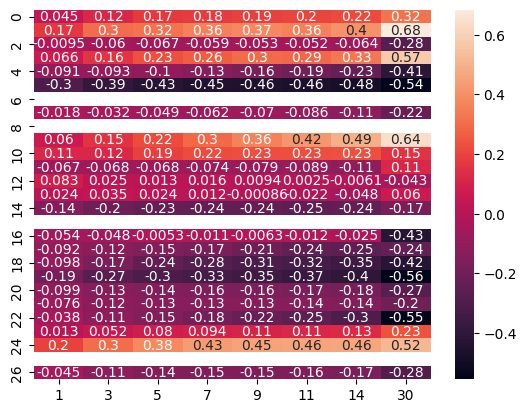

In [89]:
make_corr_matrix(windows, skus)

d:\work\market_place\venv_second\Lib\site-packages\pandas\core\nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
d:\work\market_place\venv_second\Lib\site-packages\pandas\core\nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
d:\work\market_place\venv_second\Lib\site-packages\pandas\core\nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
d:\work\market_place\venv_second\Lib\site-packages\pandas\core\nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
d:\work\market_place\venv_second\Lib\site-packages\pandas\core\nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b

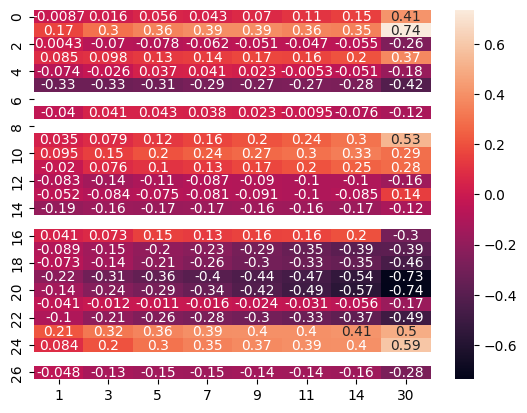

In [90]:
make_corr_matrix(windows, skus, 'spearman')

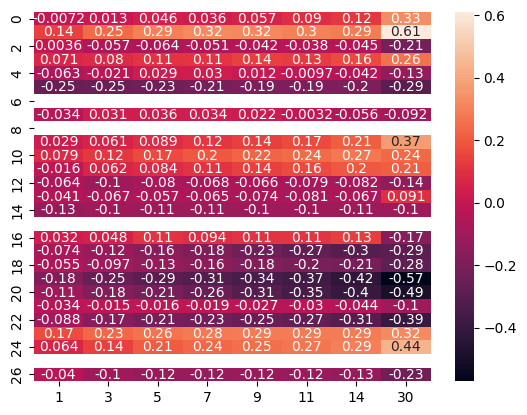

In [91]:
make_corr_matrix(windows, skus, 'kendall')

# Discounting using NN

In [3]:
from src.base_line import BaseLine
from src.net_trend_bi import PredictTrendBi
from src.exponenta import get_stat
import torch

In [4]:
input_dim = 3
hidden_dim = 128
num_layers = 2
model = PredictTrendBi(input_dim, hidden_dim, num_layers)
model.load_state_dict(torch.load('src/trend_2enc_1dec_128_bi', weights_only=False, map_location='cpu'));

In [5]:
def return_discounted_data(df, model):
    pr_orig = df['Цена СПП, ₽'].values
    pr_min, pr_max = pr_orig.min(), pr_orig.max()
    pr_norm = (pr_orig - pr_min) / (pr_max - pr_min)
    if_balance = (df['Наличие, шт']>1).astype(int).values
    sales = df['Продажи, кол-во'].values
    x = np.zeros((df.shape[0], 3))
    x[:, 0] = if_balance
    x[:, 1] = pr_norm
    x[:, 2] = sales
    x = torch.Tensor(x)
    output = model(x[None, ...]).detach().squeeze().numpy()
    discount = sales/output*output[-1]
    df['Продажи, кол-во'] = discount

In [82]:
return_discounted_data(df1, model), return_discounted_data(df2, model)

(None, None)

In [83]:
def make_corr_matrix(windows, skus, sales_main_path, sales_comp_path, method='pearson'):
    res = dict()
    for window in windows:
        ctr = 0
        per_window = list()
        for row in skus.iterrows():
            sku1, sku2 = row[1].values
            df1 = read_file(sku1, sales_main_path)
            df2 = read_file(sku2, sales_comp_path)
            return_discounted_data(df1, model)
            return_discounted_data(df2, model)
            rolling1 = df1['Продажи, кол-во'].rolling(window=window).mean()
            rolling2 = df2['Продажи, кол-во'].rolling(window=window).mean()
            corr_window = rolling1.corr(rolling2, method=method)
            if corr_window < -0.1:
                ctr += 1
            per_window.append(corr_window)
        res.update({window:per_window})
    res = pd.DataFrame(res)
    sns.heatmap(res, annot=True);

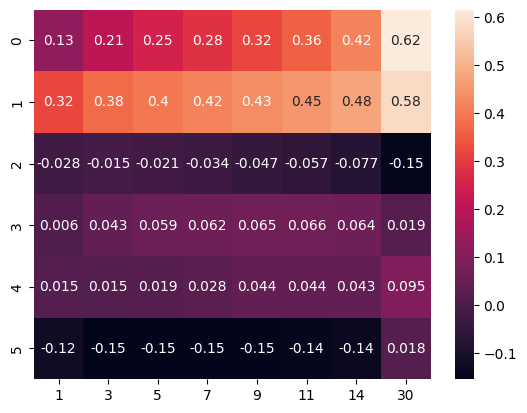

In [84]:
make_corr_matrix(windows, skus, sales_main_path, sales_comp_path)

In [85]:
sales_main_path = path + 'main/organicltd/'
sales_comp_path = path + 'comp/organicltd/'
skus = pd.read_excel(path+'competitors_mapping.xlsx', sheet_name=1)

d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
d:\work\market_place\venv_second\Lib\site-pack

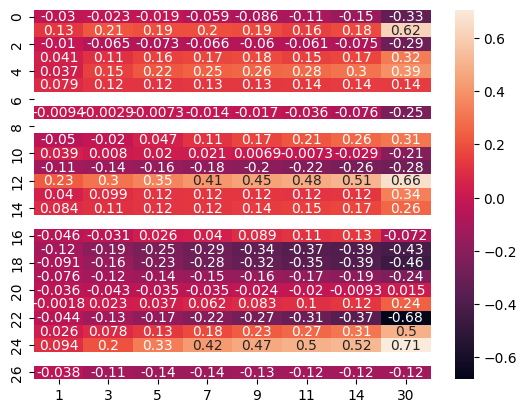

In [86]:
make_corr_matrix(windows, skus, sales_main_path, sales_comp_path)

# With exponenta

In [24]:
def find_closest(price_re, orders_re, pr):
    for i in range(2, len(price_re)):
        if price_re[i] >= pr:
            # TODO: возможно есть смысл брать 5 точек
            ord = np.interp(pr, price_re[i-2:i+1], orders_re[i-2:i+1])
            return ord
    return orders_re[0]

In [25]:
def return_discounted_data(df, model):
    pr_orig = df['Цена СПП, ₽'].values
    pr_min, pr_max = pr_orig.min(), pr_orig.max()
    pr_norm = (pr_orig - pr_min) / (pr_max - pr_min)
    if_balance = (df['Наличие, шт']>1).astype(int).values
    sales = df['Продажи, кол-во'].values
    x = np.zeros((df.shape[0], 3))
    x[:, 0] = if_balance
    x[:, 1] = pr_norm
    x[:, 2] = sales
    x = torch.Tensor(x)
    output = model(x[None, ...]).detach().squeeze().numpy()
    discount = sales/output*output[-1]
    # 
    xx = np.linspace(0,1)
    B = (x[:,0] == 1).squeeze()
    b = get_stat(pr_norm[B],discount[B])
    z = np.exp(b[0]+xx*b[1])
    exp_lvls = [find_closest(xx, z, pr_norm[i]) for i in range(len(pr_norm))]
    df['Продажи, кол-во'] = discount / exp_lvls

In [38]:
def make_corr_matrix(windows, skus, sales_main_path, sales_comp_path, method='pearson'):
    res = dict()
    for window in windows:
        ctr = 0
        per_window = list()
        for row in skus.iterrows():
            sku1, sku2 = row[1].values
            df1 = read_file(sku1, sales_main_path)
            df2 = read_file(sku2, sales_comp_path)
            try:
                return_discounted_data(df1, model)
                return_discounted_data(df2, model)
                rolling1 = df1['Продажи, кол-во'].rolling(window=window).mean()
                rolling2 = df2['Продажи, кол-во'].rolling(window=window).mean()
                corr_window = rolling1.corr(rolling2, method=method)
                if corr_window < -0.1:
                    ctr += 1
                per_window.append(corr_window)
            except:
                continue
        res.update({window:per_window})
    res = pd.DataFrame(res)
    sns.heatmap(res, annot=True);

In [8]:
# df = df1.copy()
# pr_orig = df['Цена СПП, ₽'].values
# pr_min, pr_max = pr_orig.min(), pr_orig.max()
# pr_norm = (pr_orig - pr_min) / (pr_max - pr_min)
# if_balance = (df['Наличие, шт']>1).astype(int).values
# sales = df['Продажи, кол-во'].values
# x = np.zeros((df.shape[0], 3))
# x[:, 0] = if_balance
# x[:, 1] = pr_norm
# x[:, 2] = sales
# x = torch.Tensor(x)
# output = model(x[None, ...]).detach().squeeze().numpy()
# discount = sales/output*output[-1]
# # 
# xx = np.linspace(0,1)
# B = (x[:,0] == 1).squeeze()
# b = get_stat(pr_norm[B],discount[B])
# z = np.exp(b[0]+xx*b[1])

In [28]:
windows = [1, 3, 5, 7, 9, 11, 14, 30]

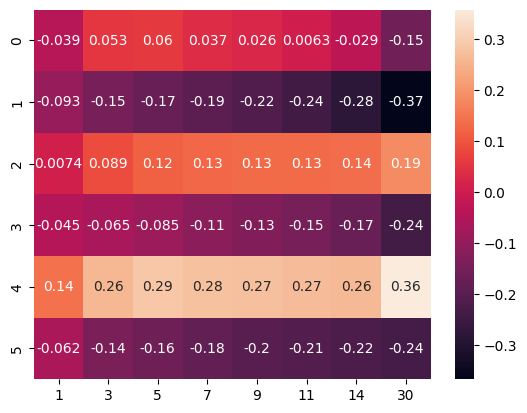

In [29]:
sales_main_path = path + 'main/indeepa/'
sales_comp_path = path + 'comp/indeepa/'
skus = pd.read_excel(path+'competitors_mapping.xlsx', sheet_name=0)
make_corr_matrix(windows, skus, sales_main_path, sales_comp_path)

d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\work\market_place\venv_second\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
d:\work\market_place\venv_second\Lib\site-pack

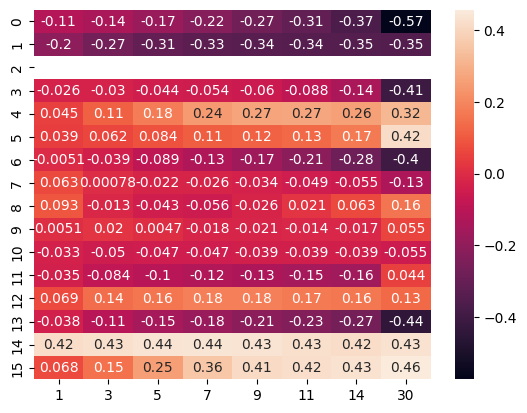

In [39]:
sales_main_path = path + 'main/organicltd/'
sales_comp_path = path + 'comp/organicltd/'
skus = pd.read_excel(path+'competitors_mapping.xlsx', sheet_name=1)
make_corr_matrix(windows, skus, sales_main_path, sales_comp_path)